# FlashTryp Data Science Coding Challenge

### Project Submitted by Ashwin Saxena(ashwinsaxena47@gmail.com)

### **Description**: *A dataset of 25000 records for males between age of 18 and 70 are provided.*
                          There are predictors(variables) provided as follows:
                          1. Years of Education 
                          2. Job Experience
                          3. College Graduate (Categorial Variable: Yes/No)
                          4. Working in/near city (Categorial Variable: Yes/No)
                          5. US Region
                          6. Commuting Distance
                          7. Number of Employees
                          8. Race
### **Dataset**: *Salary.txt(provided in directory)*
### **Problem Statement**: *Check whether the average male wages are statistically different for three race classes*
                          1. Do African American males have statistically different wages compared to Caucasian Males?
                          2. Do African American males have statistically different wages compared to all other Males?
### **Approach/Solution**: *Importing dataset, EDA, Modeling, Evaluating the performance of the model(Metrics)*

### **Programming Language**: *R*

### 1. Importing Dataset

In [1]:
data<-read.table("salary.txt",head=T,sep=",")

In [2]:
head(data)

wage,edu,exp,city,reg,race,deg,com,emp
354.94,7,45,yes,northeast,white,no,24.3,200
370.37,9,9,yes,northeast,white,no,26.2,130
754.94,11,46,yes,northeast,white,no,26.4,153
593.54,12,36,yes,northeast,other,no,9.9,86
377.23,16,22,yes,northeast,white,yes,7.1,181
284.90,8,51,yes,northeast,white,no,11.4,32


In [3]:
tail(data)

,wage,edu,exp,city,reg,race,deg,com,emp
24818,2599.09,16,11,no,west,white,yes,9.7,120
24819,1163.34,12,27,no,west,white,no,21.1,141
24820,201.80,16,13,no,west,white,yes,28.1,74
24821,356.13,12,13,no,west,white,no,12.8,154
24822,427.35,12,28,no,west,white,no,4.8,107
24823,834.02,17,30,no,west,white,yes,3.5,88


In [4]:
library("dplyr")
glimpse(tbl_df(data))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Observations: 24,823
Variables: 9
$ wage <dbl> 354.94, 370.37, 754.94, 593.54, 377.23, 284.90, 561.13, 264.06...
$ edu  <int> 7, 9, 11, 12, 16, 8, 12, 12, 14, 12, 8, 10, 14, 12, 16, 14, 16...
$ exp  <int> 45, 9, 46, 36, 22, 51, 34, 0, 18, 17, 42, 10, 19, 40, 42, 27, ...
$ city <fct> yes, yes, yes, yes, yes, yes, yes, yes, yes, yes, yes, yes, no...
$ reg  <fct> northeast, northeast, northeast, northeast, northeast, northea...
$ race <fct> white, white, white, other, white, white, other, white, white,...
$ deg  <fct> no, no, no, no, yes, no, no, no, no, no, no, no, no, no, yes, ...
$ com  <dbl> 24.3, 26.2, 26.4, 9.9, 7.1, 11.4, 18.9, 1.0, 10.2, 9.9, 8.3, 6...
$ emp  <int> 200, 130, 153, 86, 181, 32, 167, 166, 195, 43, 127, 58, 100, 9...


### 2. Transforming, visualising and modeling the data

In [5]:
summary(data)

      wage               edu             exp         city      
 Min.   :   50.39   Min.   : 0.00   Min.   :-4.00   no : 6412  
 1st Qu.:  356.13   1st Qu.:12.00   1st Qu.: 9.00   yes:18411  
 Median :  546.06   Median :12.00   Median :16.00              
 Mean   :  637.82   Mean   :13.06   Mean   :18.53              
 3rd Qu.:  830.96   3rd Qu.:16.00   3rd Qu.:27.00              
 Max.   :18777.20   Max.   :18.00   Max.   :63.00              
        reg          race        deg             com             emp       
 midwest  :6020   black: 1934   no :20699   Min.   : 0.00   Min.   :  3.0  
 northeast:5731   other: 4584   yes: 4124   1st Qu.: 5.30   1st Qu.: 67.0  
 south    :7761   white:18305               Median :10.50   Median :111.0  
 west     :5311                             Mean   :11.66   Mean   :123.2  
                                            3rd Qu.:16.80   3rd Qu.:166.0  
                                            Max.   :49.70   Max.   :631.0  

**Here we observed that some individuals have negative work experience. So we will set them to zero.
Besides, we will reorder the levels of variable race**

In [6]:
data$exp[data$exp<0]=0
data$race<-factor(data$race,levels=c("black","white","other"))

**The following table below shows the mean value of the numeric variables within each race**

In [7]:
as.data.frame(group_by(data,race)%>%summarise_if(is.numeric, funs(mean=mean)  , na.rm = TRUE))

race,wage_mean,edu_mean,exp_mean,com_mean,emp_mean
black,472.2070,12.34178,18.92606,11.65817,122.1613
white,652.2706,13.10942,18.51347,11.63437,123.2618
other,649.9659,13.17256,18.44764,11.77225,123.4315


**Here we observed that wage is the only variable(predictor) to have different means across the races.**
**We can hypothesis that race can be the important factor in determining the wages and there is differential wage according to the race. We can solidify our hypothesis after visualising the data more**

### 3. Finding Correlation

**The following graph describe the distribution of all the numerical variabes and the possible correlation among them.**

In [8]:
install.packages("GGally")
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
library(GGally)

Loading required package: ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



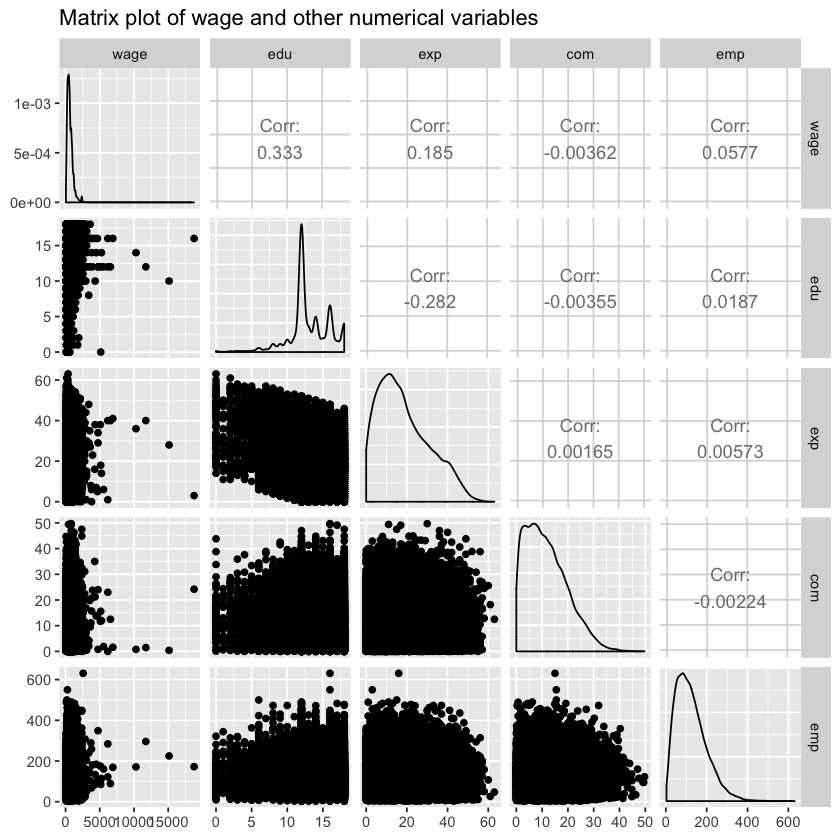

In [10]:
ggpairs(data[,c(1:3,8:9)])+
    labs(title="Matrix plot of wage and other numerical variables")

**The graph shows that the varibles wage, exp, com, and emp have a highly positive skewed distributions. Since we think about wage as dependent variable, then it is suggested to use the log transformation in order to make the wage distribution close to symmetric. This will improve the result of statistical tests.**

In [11]:
data<-mutate(data,lwg=log(wage))

**The following graph gives idea about the distribution of lwg (log of wage) accross races.**

In [12]:
library(ggplot2)

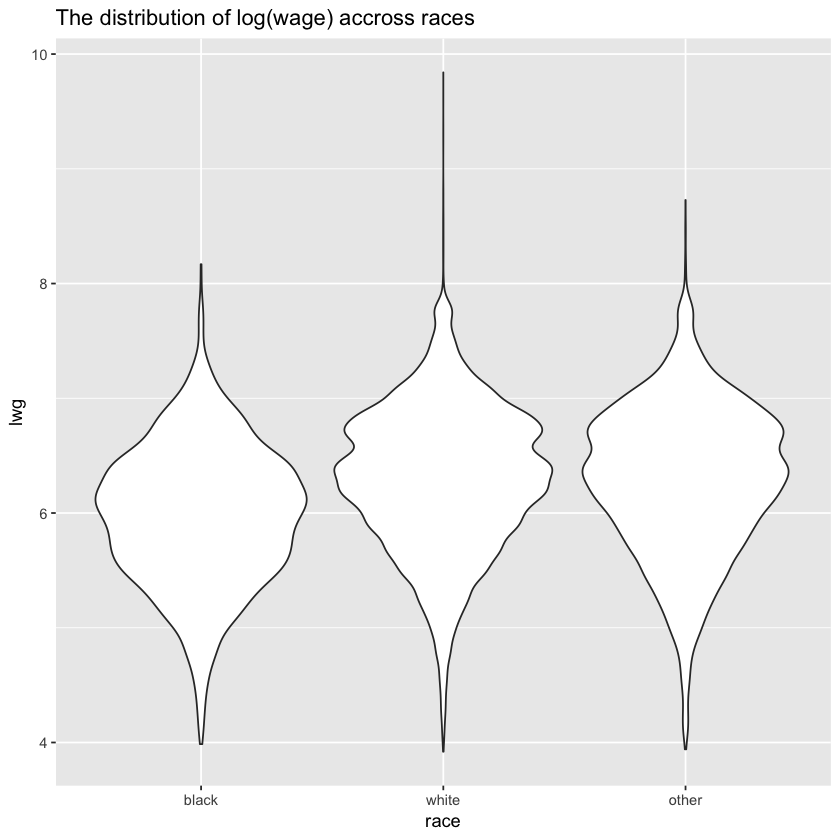

In [13]:
ggplot(data,aes(x=race,y=lwg))+
  geom_violin()+
  theme(legend.position = "none")+
  labs(title="The distribution of log(wage) accross races")

**Here, the distribution of the lwg is almost symmetric accross the races. Besides, the population of blacks have a lower center compared to the population of white or the population of other. This recalls our previous question about racial differences with respect to wages. So now we can validate are these differences statistically significant?**

**So, we will run t-test to compare the mean lwg among black, white and other pairwisely.**

In [14]:
lwg.black <- data$lwg[data$race == "black"]
lwg.white <- data$lwg[data$race == "white"]
lwg.other <- data$lwg[data$race == "other"]
t.test(lwg.black, lwg.white)


	Welch Two Sample t-test

data:  lwg.black and lwg.white
t = -21.572, df = 2391, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3426936 -0.2855804
sample estimates:
mean of x mean of y 
 5.976815  6.290952 


In [15]:
t.test(lwg.black, lwg.other)


	Welch Two Sample t-test

data:  lwg.black and lwg.other
t = -18.162, df = 3855.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3378309 -0.2720010
sample estimates:
mean of x mean of y 
 5.976815  6.281730 


In [16]:
t.test(lwg.white, lwg.other)


	Welch Two Sample t-test

data:  lwg.white and lwg.other
t = 0.86814, df = 6902, p-value = 0.3853
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01160064  0.03004273
sample estimates:
mean of x mean of y 
 6.290952  6.281730 


**From the output above, we can see significant differences between the mean of lwg in the population of black compared to the population of white and other (pvalues<0.001). On the other hand the data shows insignificant difference between the popualation of white and other (pvalue=0.3853).**

**To have better understanding of this possible differences in wage based on race, we have to control for other variables that might have some effect on wage, such as edu and exp. The following two graphs confirm that wage-biase against black exists even if we control for educationa and experience.**

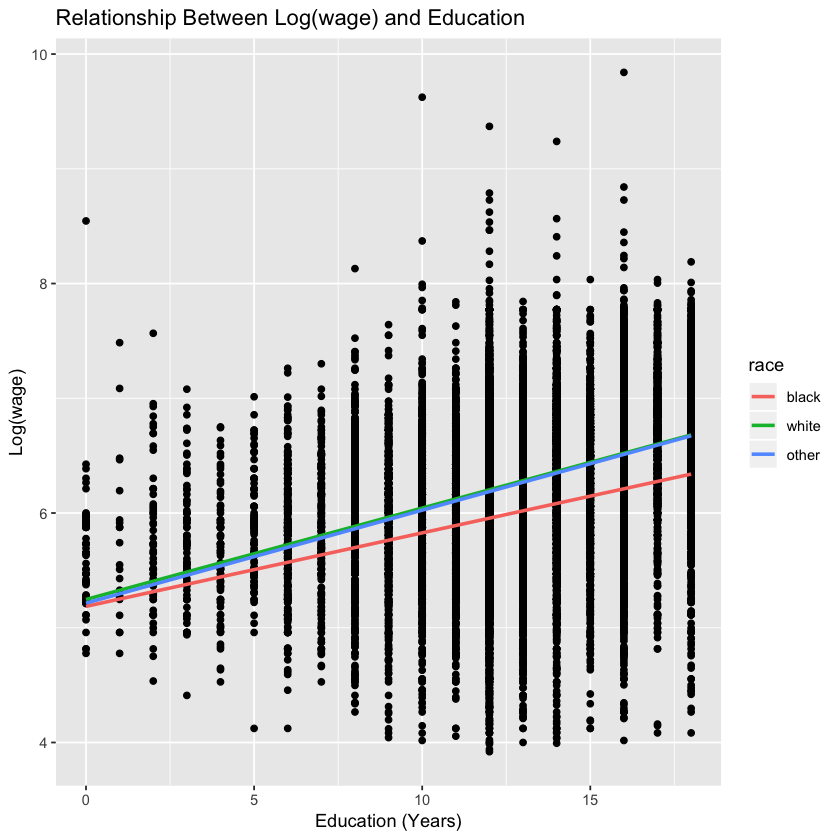

In [17]:
ggplot(data, aes(x=edu, y=lwg)) +
  geom_point() +
  geom_smooth(aes(group=race, color=race),method=lm, se=FALSE)+
  labs(title="Relationship Between Log(wage) and Education",
       x="Education (Years)", y="Log(wage)")

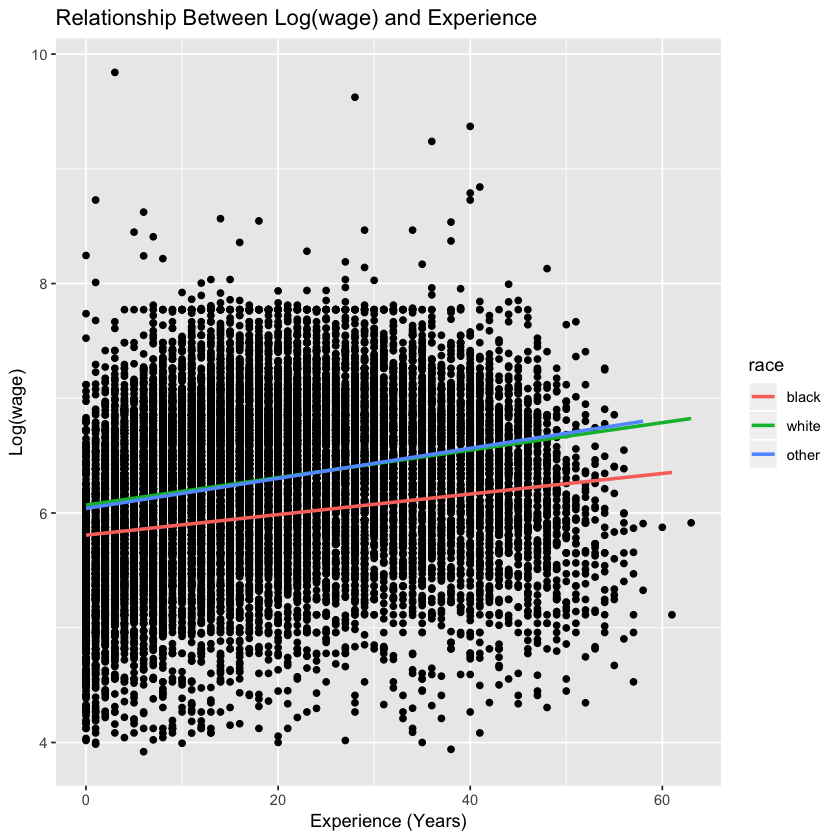

In [18]:
ggplot(data, aes(x=exp, y=lwg)) +
  geom_point() +
  geom_smooth(aes(group=race, color=race),method=lm, se=FALSE)+
  labs(title="Relationship Between Log(wage) and Experience",
       x="Experience (Years)", y="Log(wage)")

### Final Conclusion: As seen from the above two graphs, the curves of white and other are consistently above the curve of black. This reflects that discrimination against black is presistant even after controling for education and experience. Interestingly, the wage gap seems to increase as the education or experience increases.